In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns 

import warnings
warnings.filterwarnings('ignore')

In [3]:
HepatitisC = pd.read_csv('/Users/swetha/HepatitisCdata.csv')
HepatitisC.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [4]:
HepatitisC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [5]:
HepatitisC.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
HepatitisC.Category.value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [7]:
HepatitisC['Category'] = HepatitisC['Category'].apply(lambda x: 1 if x in ['3=Cirrhosis','1=Hepatitis','2=Fibrosis'] else 0)

In [8]:
HepatitisC['Category'].value_counts()

0    540
1     75
Name: Category, dtype: int64

In [9]:
HepatitisC.Sex.value_counts()

m    377
f    238
Name: Sex, dtype: int64

In [10]:
HepatitisC['Sex'] = HepatitisC['Sex'].apply(lambda x: 1 if x == 'm' else 0)
HepatitisC.Sex.value_counts()

1    377
0    238
Name: Sex, dtype: int64

In [11]:
HepatitisC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    int64  
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    int64  
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 62.6 KB


In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [13]:
imputer = IterativeImputer()
col = HepatitisC.columns
HepatitisC = imputer.fit_transform(HepatitisC)
HepatitisC = pd.DataFrame(HepatitisC,columns=col)
HepatitisC.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0.0,32.0,1.0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0.0,32.0,1.0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0.0,32.0,1.0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0.0,32.0,1.0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0.0,32.0,1.0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [14]:
HepatitisC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    float64
 1   Age       615 non-null    float64
 2   Sex       615 non-null    float64
 3   ALB       615 non-null    float64
 4   ALP       615 non-null    float64
 5   ALT       615 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      615 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      615 non-null    float64
dtypes: float64(13)
memory usage: 62.6 KB


In [15]:
#EDA

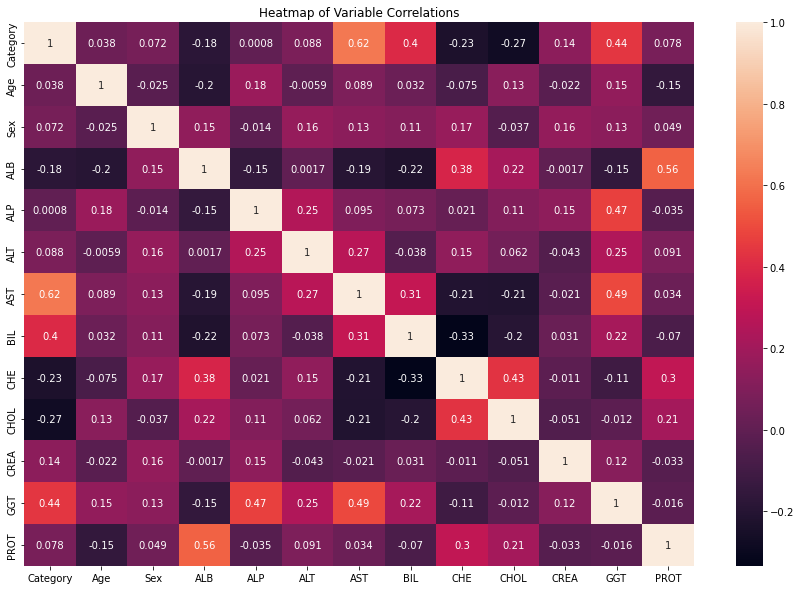

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(HepatitisC.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

In [17]:
#Category has correlations with AST, BIL, GGT. 

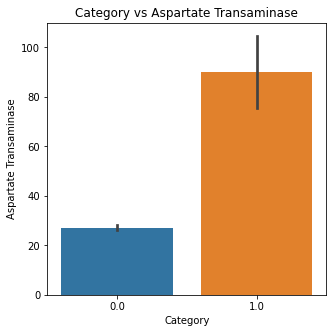

In [18]:
plt.figure(figsize=(5,5))
sns.barplot(x='Category',y='AST',data=HepatitisC)
plt.title('Category vs Aspartate Transaminase')
plt.xlabel('Category')
plt.ylabel('Aspartate Transaminase')
plt.show()

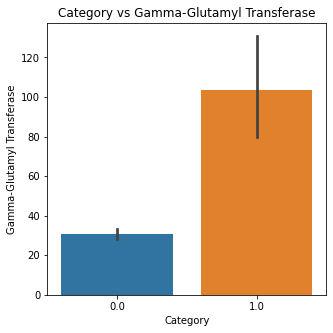

In [19]:
plt.figure(figsize=(5,5))
sns.barplot(x='Category',y='GGT',data=HepatitisC)
plt.title('Category vs Gamma-Glutamyl Transferase')
plt.xlabel('Category')
plt.ylabel('Gamma-Glutamyl Transferase')
plt.show()

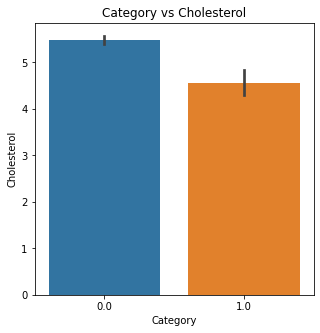

In [20]:
plt.figure(figsize=(5,5))
sns.barplot(x='Category',y='CHOL',data=HepatitisC)
plt.title('Category vs Cholesterol')
plt.xlabel('Category')
plt.ylabel('Cholesterol')
plt.show()

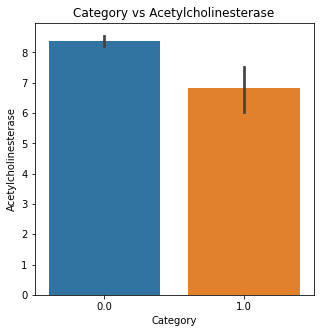

In [21]:
plt.figure(figsize=(5,5))
sns.barplot(x='Category',y='CHE',data=HepatitisC)
plt.title('Category vs Acetylcholinesterase')
plt.xlabel('Category')
plt.ylabel('Acetylcholinesterase')
plt.show()

In [22]:
HepatitisC.Category.value_counts()

0.0    540
1.0     75
Name: Category, dtype: int64

In [23]:
#Model building
#We will build a prediction model around the category variable using the other variable and applying class balancing.

In [24]:
X = HepatitisC.drop('Category',axis=1)
y = HepatitisC['Category']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
X_train.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
51,36.0,1.0,42.4,47.300000,23.0,25.5,6.1,9.46,5.29,79.0,17.5,73.8
231,53.0,1.0,44.8,119.700000,29.2,20.7,6.0,13.80,8.78,64.0,49.3,75.4
546,30.0,1.0,45.0,70.587967,66.0,45.0,14.0,12.16,6.10,86.0,43.0,77.0
354,36.0,0.0,39.9,59.000000,11.3,20.4,9.4,7.60,5.51,69.0,16.0,81.0
312,70.0,1.0,27.8,85.700000,25.4,38.9,4.2,6.06,3.96,63.0,46.0,56.9


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1,class_weight='balanced')

params = {'max_depth':[2,3,5,10,20,30,40],
         'min_samples_leaf':[70,100,120,150,170,200],
         'n_estimators':[200], 
         'max_features': [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],
         'criterion': ["gini"]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='recall')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [2, 3, 5, 10, 20, 30, 40],
                         'max_features': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
                                          0.45, 0.5],
                         'min_samples_leaf': [70, 100, 120, 150, 170, 200],
                         'n_estimators': [200]},
             scoring='recall', verbose=1)

In [27]:
Model_best = grid_search.best_estimator_

In [28]:
from sklearn.metrics import accuracy_score,recall_score,plot_roc_curve

0.9465116279069767
0.9583333333333334


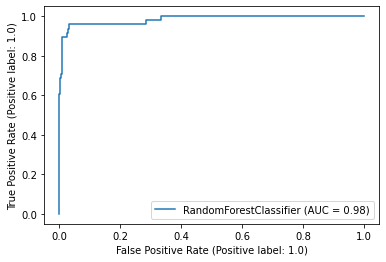

In [29]:
plot_roc_curve(Model_best,X_train,y_train)
y_train_pred = Model_best.predict(X_train)

print(accuracy_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

0.8864864864864865
0.9259259259259259


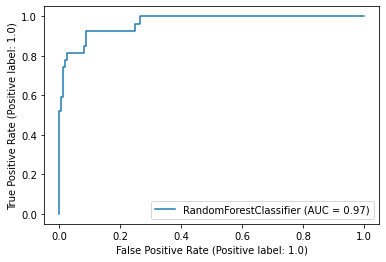

In [30]:
plot_roc_curve(Model_best,X_test,y_test)
y_test_pred = Model_best.predict(X_test)

print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

In [31]:
Feature_importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_importance = Feature_importance.sort_values(by='Importance',ascending=False)
Feature_importance = Feature_importance.set_index('Feature')
Feature_importance.head()

,Importance
Feature,
AST,0.212123
BIL,0.208917
GGT,0.170805
CHE,0.080209
CREA,0.071353


In [32]:
#We will now score the model using accuracy. 

In [33]:
Model = RandomForestClassifier(random_state=100,n_jobs=-1,class_weight='balanced')

params = {'max_depth':[2,3,5,10,20,30,40],
         'min_samples_leaf':[70,100,120,150,170,200],
         'n_estimators':[200], 
         'max_features': [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5],
         'criterion': ["gini"]}

grid_search = GridSearchCV(estimator=Model,param_grid=params,verbose=1,n_jobs=-1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 378 candidates, totalling 1890 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [2, 3, 5, 10, 20, 30, 40],
                         'max_features': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4,
                                          0.45, 0.5],
                         'min_samples_leaf': [70, 100, 120, 150, 170, 200],
                         'n_estimators': [200]},
             scoring='accuracy', verbose=1)

In [34]:
Model_best = grid_search.best_estimator_

In [35]:
from sklearn.metrics import accuracy_score,recall_score,plot_roc_curve

0.9627906976744186
0.9583333333333334


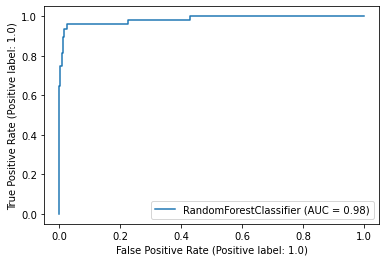

In [36]:
plot_roc_curve(Model_best,X_train,y_train)
y_train_pred = Model_best.predict(X_train)

print(accuracy_score(y_train,y_train_pred))
print(recall_score(y_train,y_train_pred))

0.918918918918919
0.9259259259259259


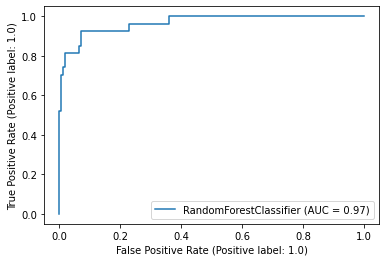

In [37]:
plot_roc_curve(Model_best,X_test,y_test)
y_test_pred = Model_best.predict(X_test)

print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))

In [38]:
Feature_importance = pd.DataFrame({'Feature':X_train.columns,'Importance':Model_best.feature_importances_})
Feature_importance = Feature_importance.sort_values(by='Importance',ascending=False)
Feature_importance = Feature_importance.set_index('Feature')
Feature_importance.head()

,Importance
Feature,
AST,0.139317
BIL,0.122064
GGT,0.100425
ALB,0.095361
ALT,0.093112


In [39]:
#As we can see we get good models using both methods of scoring. 